# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[23  1 19]
 [ 0  2  9]
 [ 1 13 12]
 [-1  4 10]
 [ 3  6  5]]
Simplices
 [[20 23 29]
 [ 6 20 29]
 [10  6 29]
 [13  9  1]
 [22 13  1]]
Points
 [[[0.22117644 0.26377711]
  [0.47054459 0.26177505]
  [0.54627181 0.38171159]]

 [[0.19297315 0.62973595]
  [0.22117644 0.26377711]
  [0.54627181 0.38171159]]

 [[0.34161512 0.74892296]
  [0.19297315 0.62973595]
  [0.54627181 0.38171159]]

 [[0.08283016 0.30836663]
  [0.01973081 0.55580393]
  [0.11635402 0.04375221]]

 [[0.13430748 0.26297466]
  [0.08283016 0.30836663]
  [0.11635402 0.04375221]]]


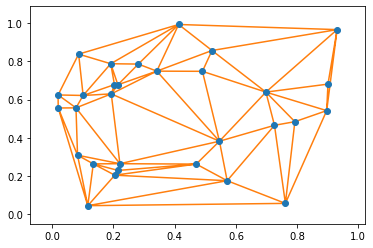

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

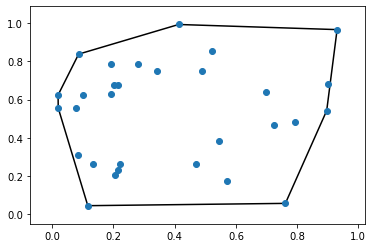

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

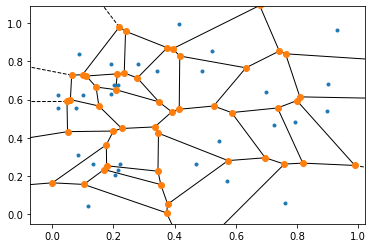

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.79263282 0.48402364]
 [0.11635402 0.04375221]
 [0.20338962 0.67828816]
 [0.76169889 0.05580947]
 [0.90075047 0.68094611]
 [0.69805283 0.63899266]
 [0.19297315 0.62973595]
 [0.20458814 0.20360589]
 [0.08642714 0.83811278]
 [0.01973081 0.55580393]
 [0.34161512 0.74892296]
 [0.19125015 0.78778173]
 [0.07777058 0.55647521]
 [0.08283016 0.30836663]
 [0.5220209  0.85711967]
 [0.10114837 0.62141109]
 [0.28139528 0.78599559]
 [0.21517878 0.22847458]
 [0.41310551 0.99351126]
 [0.57152844 0.17466509]
 [0.22117644 0.26377711]
 [0.93057867 0.96660319]
 [0.13430748 0.26297466]
 [0.47054459 0.26177505]
 [0.89660596 0.5419867 ]
 [0.72608527 0.46502803]
 [0.01936037 0.6240815 ]
 [0.21460094 0.67750456]
 [0.49076345 0.74800354]
 [0.54627181 0.38171159]]


In [8]:
%%timeit

tree.query((0.5,0.5))

30 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

572 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.32 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

962 µs ± 9.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.007028593440816694, 9087)
(0.007028593440816694, 9087)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

39.5 µs ± 575 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

33.1 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

1 ms ± 8.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

36.2 µs ± 731 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
